In [1]:
import pandas as pd
import numpy as np

## Population


In [2]:
population_df = pd.read_csv('./datasets/DECENNIALDHC2020.P1-Data.csv')

In [3]:
population_df

,GEO_ID,NAME,P1_001N,Unnamed: 3
0,Geography,Geographic Area Name,!!Total,NaN
1,860Z200US01001,ZCTA5 01001,16984,NaN
2,860Z200US01002,ZCTA5 01002,27558,NaN
3,860Z200US01003,ZCTA5 01003,13253,NaN
4,860Z200US01005,ZCTA5 01005,4900,NaN
...,...,...,...,...
536,860Z200US02779,ZCTA5 02779,6764,NaN
537,860Z200US02780,ZCTA5 02780,52299,NaN
538,860Z200US02790,ZCTA5 02790,16458,NaN
539,860Z200US02791,ZCTA5 02791,312,NaN


In [4]:
population_df.drop(0, inplace=True)
population_df = population_df.drop(columns=['Unnamed: 3'])

In [5]:
population_df = population_df.rename(columns={'P1_001N': 'Total Population'})

In [6]:
final_df = population_df.copy()

## Income and Poverty


In [7]:
income_df = pd.read_csv('./datasets/ACSST5Y2022.S1901-Data.csv')
income_df.drop(0, inplace=True)

In [8]:
income_df.head()

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M,Unnamed: 130
1,860Z200US01001,ZCTA5 01001,6611,390,4.7,1.9,3.3,1.7,4.6,1.9,...,12146,57419,8271,(X),(X),(X),(X),32.3,(X),NaN
2,860Z200US01002,ZCTA5 01002,8782,365,8.3,2.7,6.0,2.6,9.5,4.1,...,10698,62276,9152,(X),(X),(X),(X),43.9,(X),NaN
3,860Z200US01003,ZCTA5 01003,19,19,0.0,77.8,0.0,77.8,0.0,77.8,...,**,-,**,(X),(X),(X),(X),-,(X),NaN
4,860Z200US01005,ZCTA5 01005,1681,156,2.7,3.0,0.0,2.5,1.0,1.5,...,35491,61557,17505,(X),(X),(X),(X),20.1,(X),NaN
5,860Z200US01007,ZCTA5 01007,6446,366,3.3,2.1,3.7,1.6,4.3,2.5,...,11529,62264,6826,(X),(X),(X),(X),44.3,(X),NaN


In [9]:
income_df.columns

Index(['GEO_ID', 'NAME', 'S1901_C01_001E', 'S1901_C01_001M', 'S1901_C01_002E',
       'S1901_C01_002M', 'S1901_C01_003E', 'S1901_C01_003M', 'S1901_C01_004E',
       'S1901_C01_004M',
       ...
       'S1901_C04_012M', 'S1901_C04_013E', 'S1901_C04_013M', 'S1901_C04_014E',
       'S1901_C04_014M', 'S1901_C04_015E', 'S1901_C04_015M', 'S1901_C04_016E',
       'S1901_C04_016M', 'Unnamed: 130'],
      dtype='object', length=131)

In [10]:
income_df = income_df[['NAME', 'S1901_C01_012E']]

In [11]:
income_df = income_df.rename(
    columns={'S1901_C01_012E': 'Median Household Income in $'})

In [12]:
merged_df = pd.merge(final_df, income_df, on='NAME', how='left')

In [13]:
merged_df

,GEO_ID,NAME,Total Population,Median Household Income in $
0,860Z200US01001,ZCTA5 01001,16984,73398
1,860Z200US01002,ZCTA5 01002,27558,74265
2,860Z200US01003,ZCTA5 01003,13253,-
3,860Z200US01005,ZCTA5 01005,4900,97409
4,860Z200US01007,ZCTA5 01007,15423,99500
...,...,...,...,...
535,860Z200US02779,ZCTA5 02779,6764,140000
536,860Z200US02780,ZCTA5 02780,52299,68948
537,860Z200US02790,ZCTA5 02790,16458,90691
538,860Z200US02791,ZCTA5 02791,312,99490


In [14]:
final_df = merged_df
print(f"Rows = {final_df.shape[0]}")

Rows = 540


## Education


In [15]:
education_df = pd.read_csv('./datasets/ACSST5Y2022.S1501-Data.csv')
education_df.drop(0, inplace=True)

In [16]:
education_df.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,...,S1501_C06_060M,S1501_C06_061E,S1501_C06_061M,S1501_C06_062E,S1501_C06_062M,S1501_C06_063E,S1501_C06_063M,S1501_C06_064E,S1501_C06_064M,Unnamed: 770
1,860Z200US01001,ZCTA5 01001,944,268,19,25,266,146,436,207,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
2,860Z200US01002,ZCTA5 01002,8110,557,250,140,1185,499,5602,566,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
3,860Z200US01003,ZCTA5 01003,11695,216,0,21,0,21,11689,219,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
4,860Z200US01005,ZCTA5 01005,667,256,149,88,200,122,274,199,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
5,860Z200US01007,ZCTA5 01007,963,277,1,3,272,122,379,165,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN


In [17]:
education_df.columns

Index(['GEO_ID', 'NAME', 'S1501_C01_001E', 'S1501_C01_001M', 'S1501_C01_002E',
       'S1501_C01_002M', 'S1501_C01_003E', 'S1501_C01_003M', 'S1501_C01_004E',
       'S1501_C01_004M',
       ...
       'S1501_C06_060M', 'S1501_C06_061E', 'S1501_C06_061M', 'S1501_C06_062E',
       'S1501_C06_062M', 'S1501_C06_063E', 'S1501_C06_063M', 'S1501_C06_064E',
       'S1501_C06_064M', 'Unnamed: 770'],
      dtype='object', length=771)

In [18]:
education_df = education_df[['NAME', 'S1501_C02_015E']]

In [19]:
education_df = education_df.rename(
    columns={'S1501_C02_015E': 'Bachelors Degree or Higher %'})

In [20]:
merged_df = pd.merge(final_df, education_df, on='NAME', how='left')

In [21]:
merged_df

,GEO_ID,NAME,Total Population,Median Household Income in $,Bachelors Degree or Higher %
0,860Z200US01001,ZCTA5 01001,16984,73398,35.4
1,860Z200US01002,ZCTA5 01002,27558,74265,72.5
2,860Z200US01003,ZCTA5 01003,13253,-,41.0
3,860Z200US01005,ZCTA5 01005,4900,97409,34.5
4,860Z200US01007,ZCTA5 01007,15423,99500,45.0
...,...,...,...,...,...
535,860Z200US02779,ZCTA5 02779,6764,140000,38.3
536,860Z200US02780,ZCTA5 02780,52299,68948,22.5
537,860Z200US02790,ZCTA5 02790,16458,90691,30.4
538,860Z200US02791,ZCTA5 02791,312,99490,84.9


In [22]:
final_df = merged_df
print(f"Rows = {final_df.shape[0]}")

Rows = 540


## Employment


In [23]:
employment_df = pd.read_csv('./datasets/ACSDP5Y2022.DP03-Data.csv')
employment_df.drop(0, inplace=True)

In [24]:
employment_df.head()

,GEO_ID,NAME,DP03_0001E,DP03_0001M,DP03_0002E,DP03_0002M,DP03_0003E,DP03_0003M,DP03_0004E,DP03_0004M,...,DP03_0133PM,DP03_0134PE,DP03_0134PM,DP03_0135PE,DP03_0135PM,DP03_0136PE,DP03_0136PM,DP03_0137PE,DP03_0137PM,Unnamed: 550
1,860Z200US01001,ZCTA5 01001,13462,773,8444,686,8396,685,7922,656,...,2.0,7.1,2.1,7.5,3.5,3.8,2.4,18.5,5.1,NaN
2,860Z200US01002,ZCTA5 01002,20297,404,12657,786,12657,786,11864,824,...,3.1,29.7,3.8,4.4,1.6,4.6,2.3,46.1,5.7,NaN
3,860Z200US01003,ZCTA5 01003,11989,205,4115,437,4115,437,3358,369,...,9.5,7.1,10.4,0.0,100.0,0.0,53.0,60.0,60.0,NaN
4,860Z200US01005,ZCTA5 01005,4158,319,2784,387,2784,387,2698,372,...,4.9,8.8,6.0,7.9,6.7,5.6,6.3,25.2,17.7,NaN
5,860Z200US01007,ZCTA5 01007,12648,354,8686,461,8686,461,8504,461,...,2.9,6.6,3.0,12.4,6.1,5.5,3.3,20.7,7.1,NaN


In [25]:
employment_df.columns

Index(['GEO_ID', 'NAME', 'DP03_0001E', 'DP03_0001M', 'DP03_0002E',
       'DP03_0002M', 'DP03_0003E', 'DP03_0003M', 'DP03_0004E', 'DP03_0004M',
       ...
       'DP03_0133PM', 'DP03_0134PE', 'DP03_0134PM', 'DP03_0135PE',
       'DP03_0135PM', 'DP03_0136PE', 'DP03_0136PM', 'DP03_0137PE',
       'DP03_0137PM', 'Unnamed: 550'],
      dtype='object', length=551)

In [26]:
employment_df = employment_df[['NAME', 'DP03_0004PE']]

In [27]:
employment_df = employment_df.rename(
    columns={'DP03_0004PE': 'Employment Rate %'})

In [28]:
merged_df = pd.merge(final_df, employment_df, on='NAME', how='left')

In [29]:
merged_df

,GEO_ID,NAME,Total Population,Median Household Income in $,Bachelors Degree or Higher %,Employment Rate %
0,860Z200US01001,ZCTA5 01001,16984,73398,35.4,58.8
1,860Z200US01002,ZCTA5 01002,27558,74265,72.5,58.5
2,860Z200US01003,ZCTA5 01003,13253,-,41.0,28.0
3,860Z200US01005,ZCTA5 01005,4900,97409,34.5,64.9
4,860Z200US01007,ZCTA5 01007,15423,99500,45.0,67.2
...,...,...,...,...,...,...
535,860Z200US02779,ZCTA5 02779,6764,140000,38.3,68.8
536,860Z200US02780,ZCTA5 02780,52299,68948,22.5,62.0
537,860Z200US02790,ZCTA5 02790,16458,90691,30.4,61.2
538,860Z200US02791,ZCTA5 02791,312,99490,84.9,47.4


In [30]:
final_df = merged_df
print(f"Rows = {final_df.shape[0]}")

Rows = 540


## Housing


In [31]:
housing_df = pd.read_csv('./datasets/DECENNIALDHC2020.H1-Data.csv')
housing_df.drop(0, inplace=True)

In [32]:
housing_df.head()

,GEO_ID,NAME,H1_001N,Unnamed: 3
1,860Z200US01001,ZCTA5 01001,7526,NaN
2,860Z200US01002,ZCTA5 01002,11314,NaN
3,860Z200US01003,ZCTA5 01003,119,NaN
4,860Z200US01005,ZCTA5 01005,1985,NaN
5,860Z200US01007,ZCTA5 01007,6384,NaN


In [33]:
housing_df.columns

Index(['GEO_ID', 'NAME', 'H1_001N', 'Unnamed: 3'], dtype='object')

In [34]:
housing_df = housing_df[['NAME', 'H1_001N']]

In [35]:
housing_df = housing_df.rename(columns={'H1_001N': 'Total Housing Units'})

In [36]:
merged_df = pd.merge(final_df, housing_df, on='NAME', how='left')

In [37]:
merged_df

,GEO_ID,NAME,Total Population,Median Household Income in $,Bachelors Degree or Higher %,Employment Rate %,Total Housing Units
0,860Z200US01001,ZCTA5 01001,16984,73398,35.4,58.8,7526
1,860Z200US01002,ZCTA5 01002,27558,74265,72.5,58.5,11314
2,860Z200US01003,ZCTA5 01003,13253,-,41.0,28.0,119
3,860Z200US01005,ZCTA5 01005,4900,97409,34.5,64.9,1985
4,860Z200US01007,ZCTA5 01007,15423,99500,45.0,67.2,6384
...,...,...,...,...,...,...,...
535,860Z200US02779,ZCTA5 02779,6764,140000,38.3,68.8,2360
536,860Z200US02780,ZCTA5 02780,52299,68948,22.5,62.0,22285
537,860Z200US02790,ZCTA5 02790,16458,90691,30.4,61.2,7640
538,860Z200US02791,ZCTA5 02791,312,99490,84.9,47.4,318


In [38]:
final_df = merged_df
print(f"Rows = {final_df.shape[0]}")

Rows = 540


## Health


In [39]:
health_df = pd.read_csv('./datasets/ACSST5Y2022.S2701-Data.csv')
health_df.drop(0, inplace=True)

In [40]:
health_df.head()

,GEO_ID,NAME,S2701_C01_001E,S2701_C01_001M,S2701_C01_002E,S2701_C01_002M,S2701_C01_003E,S2701_C01_003M,S2701_C01_004E,S2701_C01_004M,...,S2701_C05_057M,S2701_C05_058E,S2701_C05_058M,S2701_C05_059E,S2701_C05_059M,S2701_C05_060E,S2701_C05_060M,S2701_C05_061E,S2701_C05_061M,Unnamed: 612
1,860Z200US01001,ZCTA5 01001,15558,943,1107,214,1866,443,1039,275,...,1.4,2.8,2.5,5.4,3.1,2.8,1.7,4.5,3.9,NaN
2,860Z200US01002,ZCTA5 01002,22899,306,811,213,2897,318,7660,572,...,0.6,1.0,0.6,3.0,1.7,1.1,0.7,0.9,0.7,NaN
3,860Z200US01003,ZCTA5 01003,11989,205,0,21,2936,519,8961,543,...,6.6,33.3,66.7,0.0,69.2,0.0,77.8,33.3,66.7,NaN
4,860Z200US01005,ZCTA5 01005,4730,465,120,100,795,263,413,187,...,0.8,1.3,5.9,0.0,2.1,0.7,1.3,1.4,6.6,NaN
5,860Z200US01007,ZCTA5 01007,15368,59,993,194,2083,362,1038,299,...,0.6,0.9,1.4,0.8,1.0,0.8,1.0,0.8,1.6,NaN


In [41]:
health_df.columns

Index(['GEO_ID', 'NAME', 'S2701_C01_001E', 'S2701_C01_001M', 'S2701_C01_002E',
       'S2701_C01_002M', 'S2701_C01_003E', 'S2701_C01_003M', 'S2701_C01_004E',
       'S2701_C01_004M',
       ...
       'S2701_C05_057M', 'S2701_C05_058E', 'S2701_C05_058M', 'S2701_C05_059E',
       'S2701_C05_059M', 'S2701_C05_060E', 'S2701_C05_060M', 'S2701_C05_061E',
       'S2701_C05_061M', 'Unnamed: 612'],
      dtype='object', length=613)

In [42]:
health_df = health_df[['NAME', 'S2701_C03_001E']]

In [43]:
health_df = health_df.rename(
    columns={'S2701_C03_001E': 'Insured Population %'})

In [44]:
merged_df = pd.merge(final_df, health_df, on='NAME', how='left')

In [45]:
merged_df

,GEO_ID,NAME,Total Population,Median Household Income in $,Bachelors Degree or Higher %,Employment Rate %,Total Housing Units,Insured Population %
0,860Z200US01001,ZCTA5 01001,16984,73398,35.4,58.8,7526,96.2
1,860Z200US01002,ZCTA5 01002,27558,74265,72.5,58.5,11314,98.3
2,860Z200US01003,ZCTA5 01003,13253,-,41.0,28.0,119,96.9
3,860Z200US01005,ZCTA5 01005,4900,97409,34.5,64.9,1985,99.5
4,860Z200US01007,ZCTA5 01007,15423,99500,45.0,67.2,6384,99.2
...,...,...,...,...,...,...,...,...
535,860Z200US02779,ZCTA5 02779,6764,140000,38.3,68.8,2360,97.4
536,860Z200US02780,ZCTA5 02780,52299,68948,22.5,62.0,22285,97.7
537,860Z200US02790,ZCTA5 02790,16458,90691,30.4,61.2,7640,96.7
538,860Z200US02791,ZCTA5 02791,312,99490,84.9,47.4,318,100.0


In [46]:
final_df = merged_df
print(f"Rows = {final_df.shape[0]}")

Rows = 540


## Family and Living Arrangements


In [47]:
household_df = pd.read_csv('./datasets/ACSDP5Y2022.DP02-Data.csv')
household_df.drop(0, inplace=True)

In [48]:
household_df.head()

,GEO_ID,NAME,DP02_0001E,DP02_0001M,DP02_0002E,DP02_0002M,DP02_0003E,DP02_0003M,DP02_0004E,DP02_0004M,...,DP02_0150PM,DP02_0151PE,DP02_0151PM,DP02_0152PE,DP02_0152PM,DP02_0153PE,DP02_0153PM,DP02_0154PE,DP02_0154PM,Unnamed: 618
1,860Z200US01001,ZCTA5 01001,6611,390,2823,253,876,146,698,211,...,0.3,1.1,1.0,6611,(X),91.2,4.4,87.3,4.9,NaN
2,860Z200US01002,ZCTA5 01002,8782,365,3187,296,1299,261,466,144,...,1.0,1.0,0.7,8782,(X),97.1,1.2,92.7,2.2,NaN
3,860Z200US01003,ZCTA5 01003,19,19,19,19,0,21,0,21,...,0.4,1.1,0.5,19,(X),100.0,77.8,78.9,34.4,NaN
4,860Z200US01005,ZCTA5 01005,1681,156,1075,160,271,108,170,121,...,0.4,0.1,0.4,1681,(X),92.9,4.2,91.5,4.6,NaN
5,860Z200US01007,ZCTA5 01007,6446,366,3589,309,1294,204,571,189,...,0.3,0.1,0.1,6446,(X),95.4,2.5,94.9,1.9,NaN


In [49]:
household_df.columns

Index(['GEO_ID', 'NAME', 'DP02_0001E', 'DP02_0001M', 'DP02_0002E',
       'DP02_0002M', 'DP02_0003E', 'DP02_0003M', 'DP02_0004E', 'DP02_0004M',
       ...
       'DP02_0150PM', 'DP02_0151PE', 'DP02_0151PM', 'DP02_0152PE',
       'DP02_0152PM', 'DP02_0153PE', 'DP02_0153PM', 'DP02_0154PE',
       'DP02_0154PM', 'Unnamed: 618'],
      dtype='object', length=619)

In [50]:
household_df = household_df[['NAME', 'DP02_0001E']]

In [51]:
household_df = household_df.rename(columns={'DP02_0001E': 'Total Households'})

In [52]:
merged_df = pd.merge(final_df, household_df, on='NAME', how='left')

In [53]:
merged_df

,GEO_ID,NAME,Total Population,Median Household Income in $,Bachelors Degree or Higher %,Employment Rate %,Total Housing Units,Insured Population %,Total Households
0,860Z200US01001,ZCTA5 01001,16984,73398,35.4,58.8,7526,96.2,6611
1,860Z200US01002,ZCTA5 01002,27558,74265,72.5,58.5,11314,98.3,8782
2,860Z200US01003,ZCTA5 01003,13253,-,41.0,28.0,119,96.9,19
3,860Z200US01005,ZCTA5 01005,4900,97409,34.5,64.9,1985,99.5,1681
4,860Z200US01007,ZCTA5 01007,15423,99500,45.0,67.2,6384,99.2,6446
...,...,...,...,...,...,...,...,...,...
535,860Z200US02779,ZCTA5 02779,6764,140000,38.3,68.8,2360,97.4,2192
536,860Z200US02780,ZCTA5 02780,52299,68948,22.5,62.0,22285,97.7,21232
537,860Z200US02790,ZCTA5 02790,16458,90691,30.4,61.2,7640,96.7,6692
538,860Z200US02791,ZCTA5 02791,312,99490,84.9,47.4,318,100.0,242


In [54]:
final_df = merged_df
print(f"Rows = {final_df.shape[0]}")

Rows = 540


## Business and Economy


In [55]:
business_df = pd.read_csv('./datasets/CBP2021.CB2100CBP-Data.csv')
business_df.drop(0, inplace=True)

In [56]:
business_df.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,Unnamed: 16
1,8610000US01001,"ZIP 01001 (Agawam, MA)",00,Total for all sectors,001,All establishments,001,All establishments,2021,475,447397,G,103920,G,7616,G,NaN
2,8610000US01001,"ZIP 01001 (Agawam, MA)",00,Total for all sectors,001,All establishments,210,Establishments with less than 5 employees,2021,239,N,N,N,N,N,N,NaN
3,8610000US01001,"ZIP 01001 (Agawam, MA)",00,Total for all sectors,001,All establishments,220,Establishments with 5 to 9 employees,2021,80,N,N,N,N,N,N,NaN
4,8610000US01001,"ZIP 01001 (Agawam, MA)",00,Total for all sectors,001,All establishments,230,Establishments with 10 to 19 employees,2021,72,N,N,N,N,N,N,NaN
5,8610000US01001,"ZIP 01001 (Agawam, MA)",00,Total for all sectors,001,All establishments,241,Establishments with 20 to 49 employees,2021,45,N,N,N,N,N,N,NaN


In [57]:
business_df.rename(columns={'NAME': 'CITY_NAME'}, inplace=True)
business_df['NAME'] = business_df['CITY_NAME'].apply(
    lambda s: f'ZCTA5 {s.split(" ")[1]}')
business_df['CITY_NAME'] = business_df['CITY_NAME'].apply(
    lambda s: s.split('(')[1].split(',')[0])

In [58]:
business_df

,GEO_ID,CITY_NAME,NAICS2017,NAICS2017_LABEL,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,Unnamed: 16,NAME
1,8610000US01001,Agawam,00,Total for all sectors,001,All establishments,001,All establishments,2021,475,447397,G,103920,G,7616,G,NaN,ZCTA5 01001
2,8610000US01001,Agawam,00,Total for all sectors,001,All establishments,210,Establishments with less than 5 employees,2021,239,N,N,N,N,N,N,NaN,ZCTA5 01001
3,8610000US01001,Agawam,00,Total for all sectors,001,All establishments,220,Establishments with 5 to 9 employees,2021,80,N,N,N,N,N,N,NaN,ZCTA5 01001
4,8610000US01001,Agawam,00,Total for all sectors,001,All establishments,230,Establishments with 10 to 19 employees,2021,72,N,N,N,N,N,N,NaN,ZCTA5 01001
5,8610000US01001,Agawam,00,Total for all sectors,001,All establishments,241,Establishments with 20 to 49 employees,2021,45,N,N,N,N,N,N,NaN,ZCTA5 01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23014,8610000US02790,Westport,81,Other services (except public administration),001,All establishments,220,Establishments with 5 to 9 employees,2021,8,N,N,N,N,N,N,NaN,ZCTA5 02790
23015,8610000US02790,Westport,81,Other services (except public administration),001,All establishments,230,Establishments with 10 to 19 employees,2021,4,N,N,N,N,N,N,NaN,ZCTA5 02790
23016,8610000US02790,Westport,99,Industries not classified,001,All establishments,001,All establishments,2021,3,N,N,N,N,N,N,NaN,ZCTA5 02790
23017,8610000US02791,Westport Point,00,Total for all sectors,001,All establishments,001,All establishments,2021,7,1357,J,251,J,25,J,NaN,ZCTA5 02791


In [59]:
business_df = business_df[(business_df['NAICS2017_LABEL'] == 'Total for all sectors') & (
    business_df['LFO_LABEL'] == 'All establishments') & (business_df['EMPSZES_LABEL'] == 'All establishments')]

In [60]:
business_df

,GEO_ID,CITY_NAME,NAICS2017,NAICS2017_LABEL,LFO,LFO_LABEL,EMPSZES,EMPSZES_LABEL,YEAR,ESTAB,PAYANN,PAYANN_N,PAYQTR1,PAYQTR1_N,EMP,EMP_N,Unnamed: 16,NAME
1,8610000US01001,Agawam,00,Total for all sectors,001,All establishments,001,All establishments,2021,475,447397,G,103920,G,7616,G,NaN,ZCTA5 01001
69,8610000US01002,Amherst,00,Total for all sectors,001,All establishments,001,All establishments,2021,502,315640,H,70191,H,7450,H,NaN,ZCTA5 01002
130,8610000US01003,Amherst,00,Total for all sectors,001,All establishments,001,All establishments,2021,15,9307,H,2166,H,214,G,NaN,ZCTA5 01003
137,8610000US01004,Amherst,00,Total for all sectors,001,All establishments,001,All establishments,2021,6,5618,J,1162,J,117,J,NaN,ZCTA5 01004
139,8610000US01005,Barre,00,Total for all sectors,001,All establishments,001,All establishments,2021,99,36543,G,7700,G,818,G,NaN,ZCTA5 01005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22791,8610000US02777,Swansea,00,Total for all sectors,001,All establishments,001,All establishments,2021,423,252139,G,53550,G,4934,G,NaN,ZCTA5 02777
22851,8610000US02779,Berkley,00,Total for all sectors,001,All establishments,001,All establishments,2021,94,22872,H,4302,H,520,H,NaN,ZCTA5 02779
22875,8610000US02780,Taunton,00,Total for all sectors,001,All establishments,001,All establishments,2021,1062,1796985,H,433703,H,24382,H,NaN,ZCTA5 02780
22961,8610000US02790,Westport,00,Total for all sectors,001,All establishments,001,All establishments,2021,416,141898,G,30053,G,2989,G,NaN,ZCTA5 02790


In [61]:
business_df = business_df[['NAME', 'CITY_NAME', 'ESTAB', 'PAYANN', 'EMP']]

In [62]:
business_df = business_df.rename(columns={
    'ESTAB': 'Number of establishments',
    'PAYANN': 'Annual payroll ($1000)',
    'EMP': 'Number of employees'
})

In [63]:
merged_df = pd.merge(final_df, business_df, on='NAME', how='left')

In [64]:
merged_df

,GEO_ID,NAME,Total Population,Median Household Income in $,Bachelors Degree or Higher %,Employment Rate %,Total Housing Units,Insured Population %,Total Households,CITY_NAME,Number of establishments,Annual payroll ($1000),Number of employees
0,860Z200US01001,ZCTA5 01001,16984,73398,35.4,58.8,7526,96.2,6611,Agawam,475,447397,7616
1,860Z200US01002,ZCTA5 01002,27558,74265,72.5,58.5,11314,98.3,8782,Amherst,502,315640,7450
2,860Z200US01003,ZCTA5 01003,13253,-,41.0,28.0,119,96.9,19,Amherst,15,9307,214
3,860Z200US01005,ZCTA5 01005,4900,97409,34.5,64.9,1985,99.5,1681,Barre,99,36543,818
4,860Z200US01007,ZCTA5 01007,15423,99500,45.0,67.2,6384,99.2,6446,Belchertown,229,66152,1597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,860Z200US02779,ZCTA5 02779,6764,140000,38.3,68.8,2360,97.4,2192,Berkley,94,22872,520
536,860Z200US02780,ZCTA5 02780,52299,68948,22.5,62.0,22285,97.7,21232,Taunton,1062,1796985,24382
537,860Z200US02790,ZCTA5 02790,16458,90691,30.4,61.2,7640,96.7,6692,Westport,416,141898,2989
538,860Z200US02791,ZCTA5 02791,312,99490,84.9,47.4,318,100.0,242,Westport Point,7,1357,25


In [65]:
final_df = merged_df
print(f"Rows = {final_df.shape[0]}")

Rows = 540


## Crime


In [66]:
crime_df = pd.read_csv('./datasets/crime_data.csv')

In [67]:
crime_df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson2
0,Abington,"16,448",23,4,5,3,11,153,23,122,8,1.0
1,Acton,"23,780",32,0,6,2,24,66,13,50,3,0.0
2,Acushnet,"10,533",12,0,5,0,7,35,14,19,2,0.0
3,Adams,"8,028",26,0,10,2,14,94,34,59,1,2.0
4,Agawam,"28,736",82,0,13,8,61,376,133,228,15,1.0


In [68]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   City                                  982 non-null    object 
 1   Population                            982 non-null    object 
 2   Violent crime                         982 non-null    object 
 3   Murder and nonnegligent manslaughter  982 non-null    int64  
 4   Rape1                                 982 non-null    object 
 5   Robbery                               982 non-null    object 
 6   Aggravated assault                    982 non-null    object 
 7   Property crime                        981 non-null    object 
 8   Burglary                              982 non-null    object 
 9   Larceny-theft                         982 non-null    object 
 10  Motor vehicle theft                   981 non-null    object 
 11  Arson2             

In [69]:

for col in crime_df.columns[1:]:  # Skip the first column (City)
    crime_df[col] = crime_df[col].astype(
        str).str.replace(',', '').astype(float)

crime_df.rename(columns={'City': 'CITY_NAME'}, inplace=True)

In [70]:
crime_df.to_csv('crime_df_clean.csv', index=False)

In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

for col in crime_df.columns[1:]:  
    crime_df[col] = crime_df[col].astype(
        str).str.replace(',', '').astype(float)

weights = {
    "Violent crime": 0.30,
    "Murder and nonnegligent manslaughter": 0.15,
    "Rape1": 0.10,
    "Robbery": 0.10,
    "Aggravated assault": 0.10,
    "Property crime": 0.10,
    "Burglary": 0.05,
    "Larceny-theft": 0.05,
    "Motor vehicle theft": 0.03,
    "Arson2": 0.02,
}

columns_to_normalize = list(weights.keys())
scaler = MinMaxScaler()

crime_df_normalized = pd.DataFrame(
    scaler.fit_transform(crime_df[columns_to_normalize]),
    columns=columns_to_normalize
)

crime_df["Crime Score per Person (out of 100)"] = (
    crime_df_normalized.apply(
        lambda row: sum(row[col] * weights[col] for col in columns_to_normalize), axis=1
    ) / crime_df["Population"]
)

crime_df["Crime Score per Person (out of 100)"] = (
    (crime_df["Crime Score per Person (out of 100)"] -
     crime_df["Crime Score per Person (out of 100)"].min())
    / (crime_df["Crime Score per Person (out of 100)"].max() - crime_df["Crime Score per Person (out of 100)"].min())
) * 100

In [72]:
crime_df

,CITY_NAME,Population,Violent crime,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson2,Crime Score per Person (out of 100)
0,Abington,16448.0,23.0,4.0,5.0,3.0,11.0,153.0,23.0,122.0,8.0,1.0,44.425987
1,Acton,23780.0,32.0,0.0,6.0,2.0,24.0,66.0,13.0,50.0,3.0,0.0,7.482564
2,Acushnet,10533.0,12.0,0.0,5.0,0.0,7.0,35.0,14.0,19.0,2.0,0.0,10.046601
3,Adams,8028.0,26.0,0.0,10.0,2.0,14.0,94.0,34.0,59.0,1.0,2.0,37.993598
4,Agawam,28736.0,82.0,0.0,13.0,8.0,61.0,376.0,133.0,228.0,15.0,1.0,23.608517
...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,Wilton,3768.0,6.0,0.0,5.0,0.0,1.0,20.0,7.0,13.0,0.0,0.0,19.729854
978,Winchester,4192.0,8.0,0.0,4.0,1.0,3.0,34.0,6.0,23.0,5.0,2.0,37.303845
979,Windham,14876.0,5.0,0.0,2.0,0.0,3.0,59.0,8.0,51.0,0.0,0.0,4.040988
980,Wolfeboro,6403.0,4.0,0.0,1.0,0.0,3.0,34.0,4.0,26.0,4.0,0.0,6.350299


In [73]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   GEO_ID                        540 non-null    object
 1   NAME                          540 non-null    object
 2   Total Population              540 non-null    object
 3   Median Household Income in $  540 non-null    object
 4   Bachelors Degree or Higher %  540 non-null    object
 5   Employment Rate %             540 non-null    object
 6   Total Housing Units           540 non-null    object
 7   Insured Population %          540 non-null    object
 8   Total Households              540 non-null    object
 9   CITY_NAME                     529 non-null    object
 10  Number of establishments      529 non-null    object
 11  Annual payroll ($1000)        529 non-null    object
 12  Number of employees           529 non-null    object
dtypes: object(13)
memory

In [74]:
# Group by 'CITY_NAME' and get the index of the row with the maximum 'Population'
max_population_indices = crime_df.groupby('CITY_NAME')['Population'].idxmax()

# Filter the original DataFrame to keep only rows with maximum 'Population'
crime_df = crime_df.loc[max_population_indices]

In [75]:
merged_df = pd.merge(final_df, crime_df, on='CITY_NAME', how='left')

In [76]:
merged_df.isnull().sum()

GEO_ID                                    0
NAME                                      0
Total Population                          0
Median Household Income in $              0
Bachelors Degree or Higher %              0
Employment Rate %                         0
Total Housing Units                       0
Insured Population %                      0
Total Households                          0
CITY_NAME                                11
Number of establishments                 11
Annual payroll ($1000)                   11
Number of employees                      11
Population                              201
Violent crime                           201
Murder and nonnegligent manslaughter    201
Rape1                                   201
Robbery                                 201
Aggravated assault                      201
Property crime                          201
Burglary                                201
Larceny-theft                           201
Motor vehicle theft             

In [77]:
final_df = merged_df
print(f"Rows = {final_df.shape[0]}")

Rows = 540


In [78]:
final_df['NAME'] = final_df['NAME'].apply(lambda x: x.split(' ')[1])
final_df.rename(columns={'NAME': 'ZIP'}, inplace=True)
final_df.replace("-", np.nan, inplace=True)
final_df['Median Household Income in $'] = final_df['Median Household Income in $'].apply(
    lambda x: float(str(x).replace("+", "").replace(",", "")))

In [79]:
final_df

,GEO_ID,ZIP,Total Population,Median Household Income in $,Bachelors Degree or Higher %,Employment Rate %,Total Housing Units,Insured Population %,Total Households,CITY_NAME,...,Murder and nonnegligent manslaughter,Rape1,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson2,Crime Score per Person (out of 100)
0,860Z200US01001,01001,16984,73398.0,35.4,58.8,7526,96.2,6611,Agawam,...,0.0,13.0,8.0,61.0,376.0,133.0,228.0,15.0,1.0,23.608517
1,860Z200US01002,01002,27558,74265.0,72.5,58.5,11314,98.3,8782,Amherst,...,0.0,28.0,2.0,69.0,173.0,55.0,103.0,15.0,2.0,18.126569
2,860Z200US01003,01003,13253,NaN,41.0,28.0,119,96.9,19,Amherst,...,0.0,28.0,2.0,69.0,173.0,55.0,103.0,15.0,2.0,18.126569
3,860Z200US01005,01005,4900,97409.0,34.5,64.9,1985,99.5,1681,Barre,...,0.0,18.0,3.0,43.0,203.0,20.0,183.0,0.0,3.0,61.742312
4,860Z200US01007,01007,15423,99500.0,45.0,67.2,6384,99.2,6446,Belchertown,...,0.0,1.0,1.0,14.0,55.0,12.0,38.0,5.0,0.0,5.946018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,860Z200US02779,02779,6764,140000.0,38.3,68.8,2360,97.4,2192,Berkley,...,0.0,2.0,0.0,6.0,19.0,9.0,9.0,1.0,0.0,8.315398
536,860Z200US02780,02780,52299,68948.0,22.5,62.0,22285,97.7,21232,Taunton,...,2.0,15.0,17.0,183.0,345.0,86.0,238.0,21.0,3.0,22.952746
537,860Z200US02790,02790,16458,90691.0,30.4,61.2,7640,96.7,6692,Westport,...,0.0,0.0,2.0,2.0,193.0,20.0,152.0,21.0,0.0,4.612028
538,860Z200US02791,02791,312,99490.0,84.9,47.4,318,100.0,242,Westport Point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
final_df.isnull().sum()

GEO_ID                                    0
ZIP                                       0
Total Population                          0
Median Household Income in $             31
Bachelors Degree or Higher %              6
Employment Rate %                         6
Total Housing Units                       0
Insured Population %                      7
Total Households                          0
CITY_NAME                                11
Number of establishments                 11
Annual payroll ($1000)                   11
Number of employees                      11
Population                              201
Violent crime                           201
Murder and nonnegligent manslaughter    201
Rape1                                   201
Robbery                                 201
Aggravated assault                      201
Property crime                          201
Burglary                                201
Larceny-theft                           201
Motor vehicle theft             

In [81]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

metric_columns = ['Total Population',
                  'Median Household Income in $',
                  'Bachelors Degree or Higher %',
                  'Employment Rate %',
                  'Total Housing Units',
                  'Insured Population %',
                  'Total Households',
                  'Number of establishments',
                  'Annual payroll ($1000)',
                  'Number of employees',
                  'Crime Score per Person (out of 100)']


weights = {
    'Total Population': 6.0,
    'Median Household Income in $': 10.0,
    'Bachelors Degree or Higher %': 10.0,
    'Employment Rate %': 10.0,
    'Total Housing Units': 3.0,
    'Insured Population %': 7.0,
    'Total Households': 3.0,
    'Number of establishments': 7.0,
    'Annual payroll ($1000)': 7.0,
    'Number of employees': 4.0,
    'Crime Score per Person (out of 100)': 10.0,  
}

def calculate_city_scores(dataframe_original):
    dataframe = dataframe_original.copy()
    
    for column in metric_columns:
        if column not in dataframe.columns:
            dataframe[column] = 0  
        dataframe[column].fillna(0, inplace=True)
    
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(dataframe[metric_columns])
    normalized_df = pd.DataFrame(
        normalized_data, columns=[f'Normalized {col}' for col in metric_columns], index=dataframe.index)
    
    normalized_df['Normalized Crime Score per Person (out of 100)'] = 1 - normalized_df['Normalized Crime Score per Person (out of 100)']
    
    city_scores = normalized_df.apply(lambda row: sum(
        row[f'Normalized {col}'] * weights[col] for col in weights), axis=1)
    
    dataframe['City Score'] = city_scores

    city_score_scaler = MinMaxScaler(feature_range=(1, 100))
    dataframe['City Score'] = city_score_scaler.fit_transform(dataframe[['City Score']])

    result_df = dataframe_original.join(normalized_df).join(dataframe[['City Score']])

    return result_df



df_with_scores = calculate_city_scores(final_df)


/var/folders/yh/6h80w_rj1791m4c0ts_897s00000gn/T/ipykernel_5168/1086401815.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column].fillna(0, inplace=True)


In [82]:
df_with_scores.to_csv('city_data_final.csv', index=False)

<Axes: >

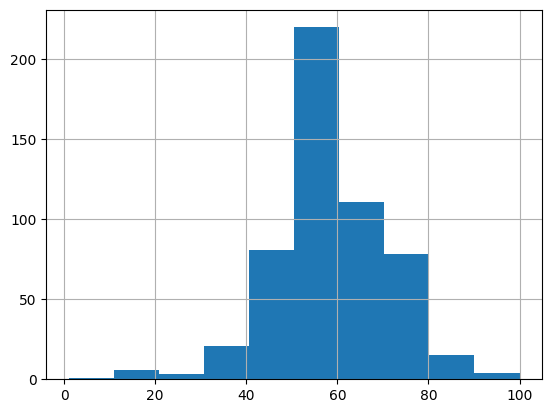

In [83]:
df_with_scores['City Score'].hist()

In [84]:
df_with_scores.shape

(540, 37)

In [85]:
df_with_scores.columns

Index(['GEO_ID', 'ZIP', 'Total Population', 'Median Household Income in $',
       'Bachelors Degree or Higher %', 'Employment Rate %',
       'Total Housing Units', 'Insured Population %', 'Total Households',
       'CITY_NAME', 'Number of establishments', 'Annual payroll ($1000)',
       'Number of employees', 'Population', 'Violent crime',
       'Murder and nonnegligent manslaughter', 'Rape1', 'Robbery',
       'Aggravated assault', 'Property crime', 'Burglary', 'Larceny-theft',
       'Motor vehicle theft', 'Arson2', 'Crime Score per Person (out of 100)',
       'Normalized Total Population',
       'Normalized Median Household Income in $',
       'Normalized Bachelors Degree or Higher %',
       'Normalized Employment Rate %', 'Normalized Total Housing Units',
       'Normalized Insured Population %', 'Normalized Total Households',
       'Normalized Number of establishments',
       'Normalized Annual payroll ($1000)', 'Normalized Number of employees',
       'Normalized Crime 

In [86]:
df_with_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   GEO_ID                                          540 non-null    object 
 1   ZIP                                             540 non-null    object 
 2   Total Population                                540 non-null    object 
 3   Median Household Income in $                    509 non-null    float64
 4   Bachelors Degree or Higher %                    534 non-null    object 
 5   Employment Rate %                               534 non-null    object 
 6   Total Housing Units                             540 non-null    object 
 7   Insured Population %                            533 non-null    object 
 8   Total Households                                540 non-null    object 
 9   CITY_NAME                                  